In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import itertools as it

In [10]:
def square_maze(size):
    return np.ones((size, size))

def ring_maze(s):
    maze = np.zeros([s,s])
    maze[0] = 1
    maze[:,0] = 1
    maze[-1] = 1
    maze[:,-1] = 1
    return maze

def path_maze(s):
    maze = np.zeros([s,s])
    maze[0] = 1
    maze[:,0] = 1
    maze[-1] = 1
    maze[:,-1] = 1
    maze[0,0] = 0

    return maze


def make_matrix_from(maze):
    
    def in_maze(s):
        return s[0] >= 0 and s[0] < maze.shape[0] and s[1] >= 0 and s[1] < maze.shape[1]

    def is_free(s):
        return maze[s[0],s[1]] == 1

    def valid_state(s):
        return in_maze(s) and is_free(s)
    
    states = [np.array(s) for s in it.product(range(maze.shape[0]), range(maze.shape[1])) if maze[s[0], s[1]] == 1]
    adja = np.eye(len(states))
    idx = np.zeros(maze.shape, dtype=np.int)
    c = 0
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 0:
                continue
            idx[i, j] = c
            c += 1
    
    for i, state in enumerate(states):
        possible_next_states = [state + d for d in np.array([[1,0],[-1,0],[0,1],[0,-1]])]
        filtered = list(filter(valid_state, possible_next_states))
        for f in filtered:
            adja[i, idx[f[0], f[1]]] = 1
            adja[idx[f[0], f[1]], i] = 1
    return adja, idx


In [11]:
maze.shape

(10, 10)

In [12]:
maze = np.ones([10,10])
adj,idx_mtx = make_matrix_from(maze)
T = adj/np.sum(adj,axis=0)

In [13]:
maze

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [14]:
adj

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [15]:
gamma = 0.99
SR = np.linalg.inv(np.eye(T.shape[0]) - gamma * T)

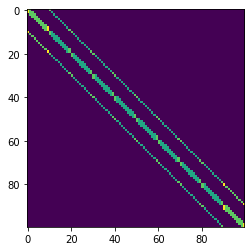

In [16]:
plt.imshow(T)

In [17]:

def eigdecomp(M):
    E, V = np.linalg.eig(M)
    idx = np.argsort(E)[::-1]
    return V[:, idx[:]].astype(float), E

def vec2maze(vec, maze):
    vec_iter = iter(vec)
    res = []
    walls = []
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 1:
                res.append(next(vec_iter))
            else:
                res.append(0)
    return np.array(res).reshape(maze.shape)

def plot_eigvecs(eig_vecs, maze, grid_size=10, filename=None, figsize=(15,15)):
    plt.figure(figsize=figsize)
    for i in range(eig_vecs.shape[0]-1):
        if i >= grid_size**2:
            break
        ax = plt.subplot(grid_size, grid_size, i+1)
        ax.matshow(vec2maze(eig_vecs[:, i+1], maze), cmap='RdBu_r')
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        plt.grid(False)
    plt.tight_layout()
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight')
    plt.show()

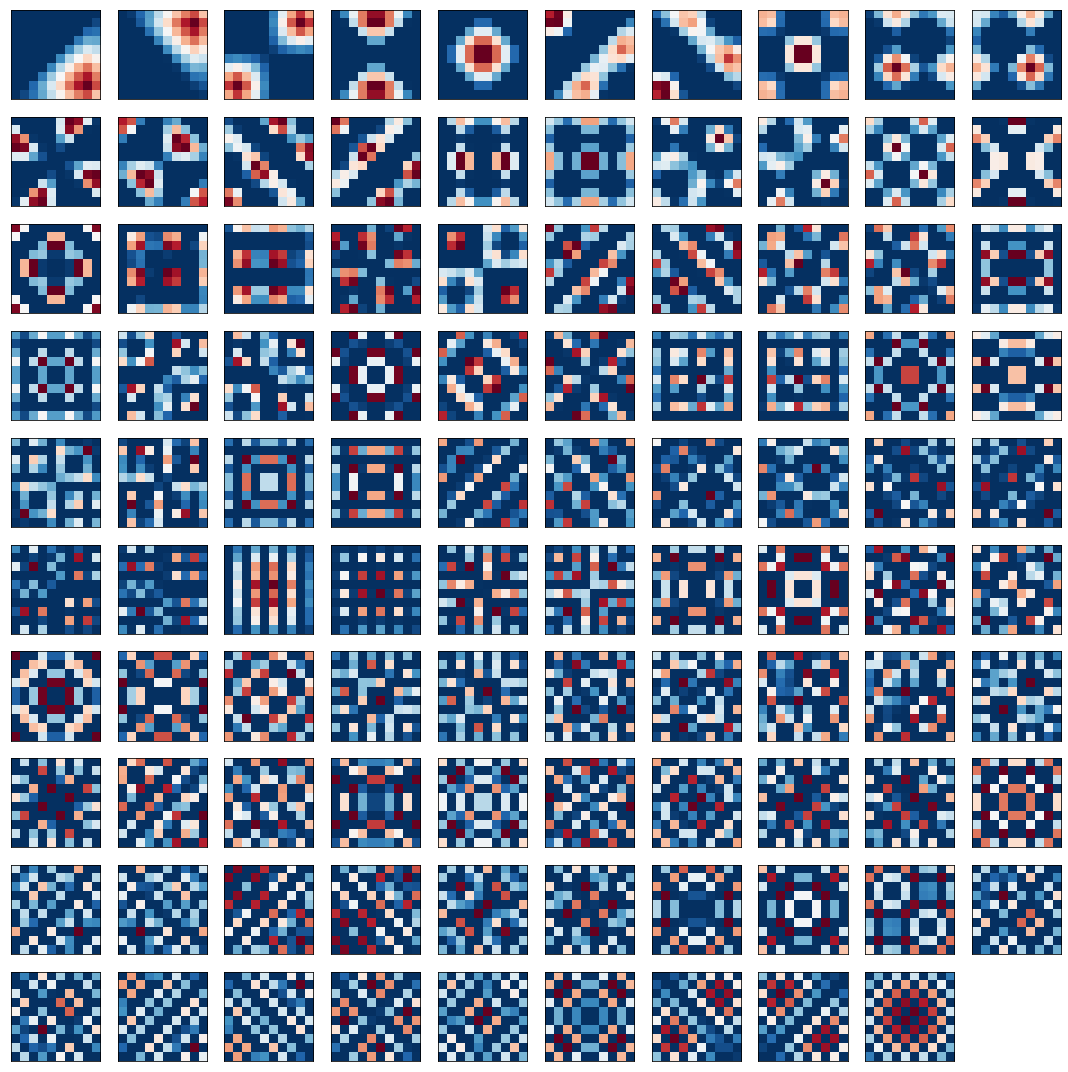

In [18]:
V, E = eigdecomp(T)
V[V < 0] = 0
plot_eigvecs(V, maze)


/Users/Yves/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


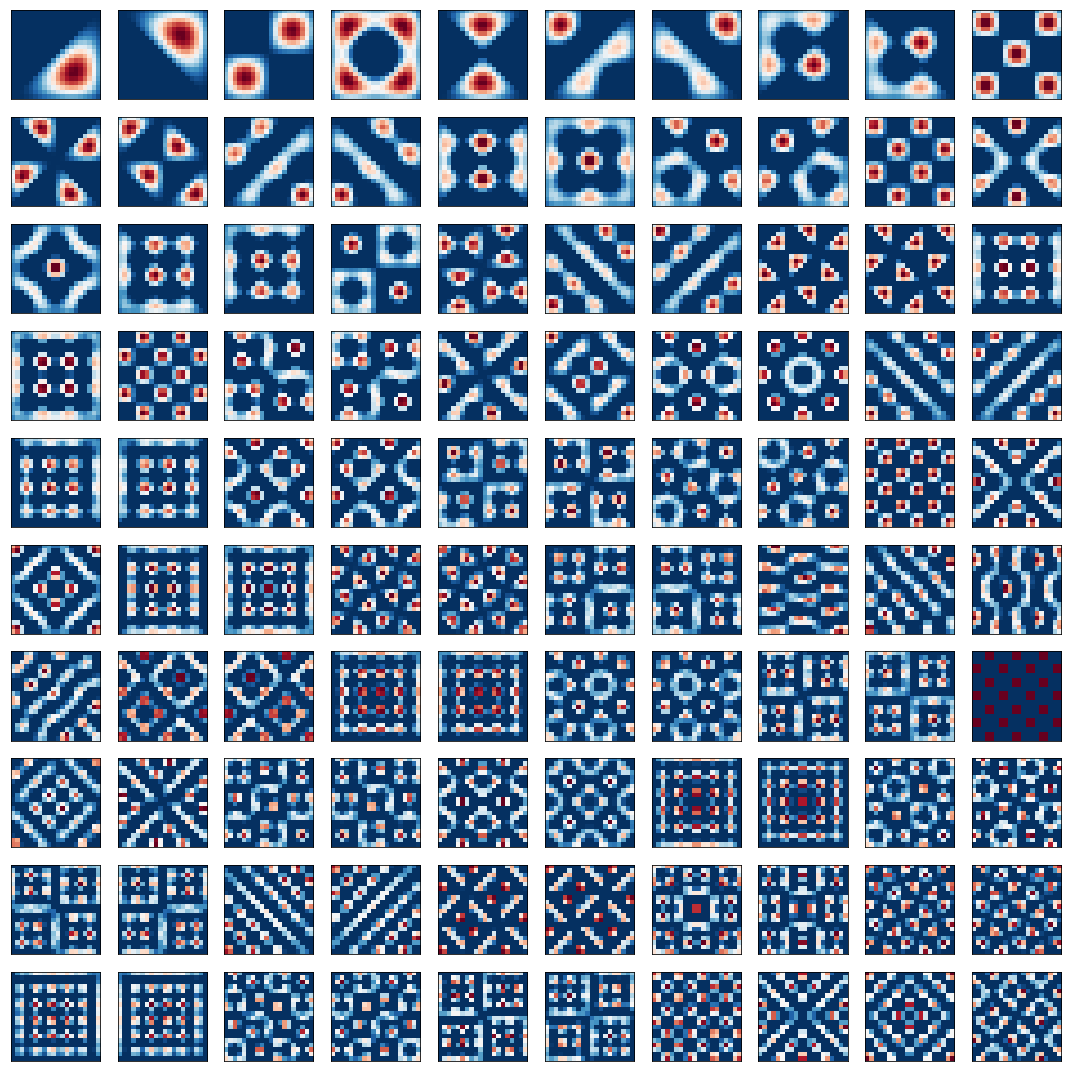

In [128]:
V, E = eigdecomp(adj)
V[V < 0] = 0
plot_eigvecs(V, maze)


In [129]:
adj[np.diag_indices_from(adj)] = 0

/Users/Yves/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


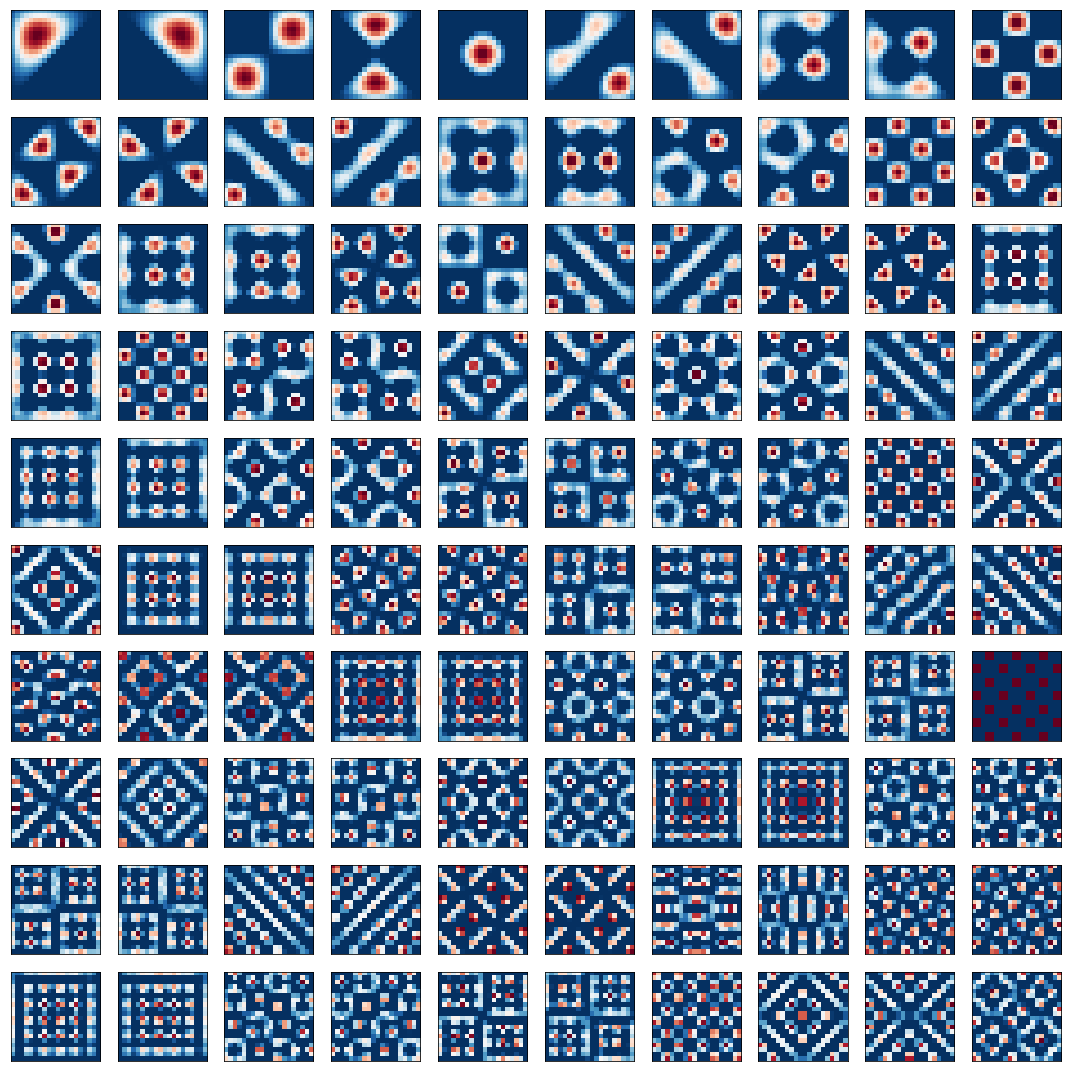

In [130]:
V, E = eigdecomp(adj)
V[V < 0] = 0
plot_eigvecs(V, maze)


In [132]:
import pandas as pd

In [144]:
df = pd.DataFrame(columns=['1','2','3'],data=[range(3) for _ in range(5)])

In [150]:
df

,1,2,3
0,0,1,2
1,0,1,2
2,0,1,2
3,0,1,2
4,0,1,2


In [164]:
df['1'].values

array([0, 0, 0, 0, 0])

In [162]:
row

1    0
2    1
3    2
Name: 4, dtype: int64